In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score


In [35]:
ds=pd.read_csv("flights.csv",low_memory=False)
ds1=ds.head(110000)
ds1

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,2015,1,6,2,WN,2966,N771SA,SAT,ATL,1640,...,2001.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
89996,2015,1,6,2,WN,463,N263WN,SAT,LAS,1640,...,1726.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
89997,2015,1,6,2,WN,554,N287WN,SJC,LAS,1640,...,1810.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
89998,2015,1,6,2,AA,1116,N567AA,ORD,MSP,1640,...,1833.0,25.0,0,0,NaN,11.0,0.0,14.0,0.0,0.0


In [36]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 90000 non-null  int64  
 1   MONTH                90000 non-null  int64  
 2   DAY                  90000 non-null  int64  
 3   DAY_OF_WEEK          90000 non-null  int64  
 4   AIRLINE              90000 non-null  object 
 5   FLIGHT_NUMBER        90000 non-null  int64  
 6   TAIL_NUMBER          89854 non-null  object 
 7   ORIGIN_AIRPORT       90000 non-null  object 
 8   DESTINATION_AIRPORT  90000 non-null  object 
 9   SCHEDULED_DEPARTURE  90000 non-null  int64  
 10  DEPARTURE_TIME       87816 non-null  float64
 11  DEPARTURE_DELAY      87816 non-null  float64
 12  TAXI_OUT             87751 non-null  float64
 13  WHEELS_OFF           87751 non-null  float64
 14  SCHEDULED_TIME       90000 non-null  float64
 15  ELAPSED_TIME         87534 non-null 

In [37]:
ds1.DIVERTED.value_counts()

0    89797
1      203
Name: DIVERTED, dtype: int64

In [38]:
#sns.pairplot(ds1)

In [39]:
ds1.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.457975,0.008855,-0.124123,-0.106786,0.092261,0.098330,-0.102434,...,-0.092115,-0.070420,0.106720,0.007186,0.008215,0.110461,-0.006650,0.000038,0.052552,0.062980
DAY_OF_WEEK,NaN,NaN,-0.457975,1.000000,0.010869,0.076482,0.073749,0.061497,0.009860,0.072216,...,0.052153,0.024469,0.072463,-0.000608,-0.013256,-0.023412,0.005844,0.000547,0.041978,-0.050743
FLIGHT_NUMBER,NaN,NaN,0.008855,0.010869,1.000000,-0.004150,0.009550,0.036647,0.059410,0.015590,...,-0.021880,-0.001772,0.057061,0.008114,0.092858,-0.038542,-0.007441,0.023056,0.079923,0.003872
SCHEDULED_DEPARTURE,NaN,NaN,-0.124123,0.076482,-0.004150,1.000000,0.939911,0.167332,-0.073328,0.908156,...,0.721076,0.538265,0.150485,0.000650,-0.003132,-0.106482,-0.019431,-0.052017,0.175249,-0.043731
DEPARTURE_TIME,NaN,NaN,-0.106786,0.073749,0.009550,0.939911,1.000000,0.237381,-0.061753,0.965634,...,0.724974,0.572787,0.219676,0.005080,0.013387,-0.084452,-0.013845,-0.013018,0.237715,-0.050677
DEPARTURE_DELAY,NaN,NaN,0.092261,0.061497,0.036647,0.167332,0.237381,1.000000,0.062267,0.224569,...,0.147878,0.076494,0.951554,0.022112,0.035247,0.087371,0.008913,0.614276,0.604712,0.211450
TAXI_OUT,NaN,NaN,0.098330,0.009860,0.059410,-0.073328,-0.061753,0.062267,1.000000,-0.035510,...,-0.057137,-0.041158,0.245233,0.007710,0.013121,0.413485,-0.008176,-0.026003,-0.125096,0.119736
WHEELS_OFF,NaN,NaN,-0.102434,0.072216,0.015590,0.908156,0.965634,0.224569,-0.035510,1.000000,...,0.734369,0.597325,0.212933,0.004858,-0.001844,-0.078907,-0.015018,-0.017453,0.214694,-0.059593


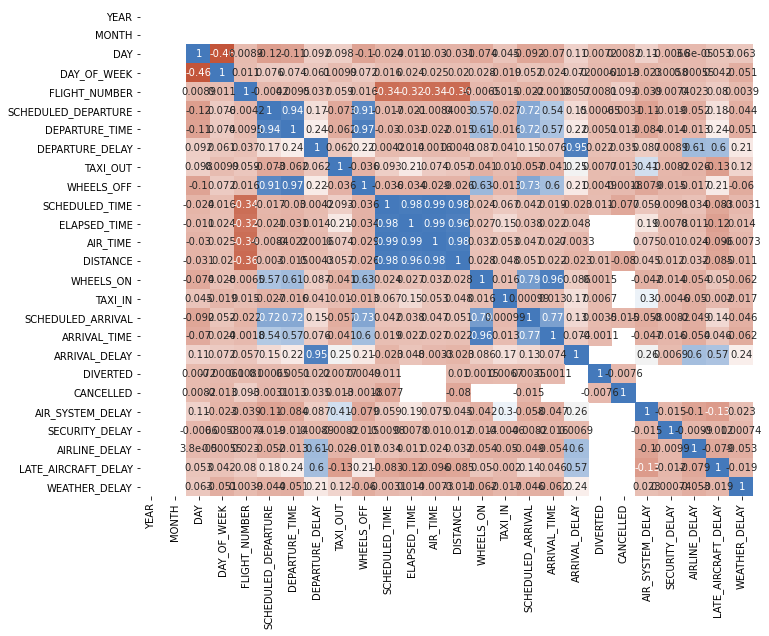

In [40]:
import seaborn as sns
plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(20,250,as_cmap=True)
sns.heatmap(ds1.corr(), annot = True,cbar=False,cmap=cmap)

In [41]:
ds1.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              146
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          2184
DEPARTURE_DELAY         2184
TAXI_OUT                2249
WHEELS_OFF              2249
SCHEDULED_TIME             0
ELAPSED_TIME            2466
AIR_TIME                2466
DISTANCE                   0
WHEELS_ON               2308
TAXI_IN                 2308
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            2308
ARRIVAL_DELAY           2466
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    87737
AIR_SYSTEM_DELAY       58557
SECURITY_DELAY         58557
AIRLINE_DELAY          58557
LATE_AIRCRAFT_DELAY    58557
WEATHER_DELAY          58557
dtype: int64

In [42]:
ds2=ds1.drop(['YEAR','AIRLINE','DISTANCE','SCHEDULED_TIME','FLIGHT_NUMBER','TAIL_NUMBER','TAXI_OUT','WHEELS_OFF','AIR_TIME','ELAPSED_TIME','DEPARTURE_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','ARRIVAL_TIME'],axis='columns')

In [43]:
ds2

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,1,LAX,PBI,10,-8.0,750,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,1,SFO,CLT,20,-2.0,806,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,1,LAX,MIA,20,-5.0,805,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,1,1,SEA,ANC,25,-1.0,320,-21.0,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,1,6,SAT,ATL,1640,-1.0,1950,11.0,0,0,NaN,NaN,NaN,NaN,NaN
89996,1,6,SAT,LAS,1640,11.0,1740,-14.0,0,0,NaN,NaN,NaN,NaN,NaN
89997,1,6,SJC,LAS,1640,0.0,1800,10.0,0,0,NaN,NaN,NaN,NaN,NaN
89998,1,6,ORD,MSP,1640,14.0,1808,25.0,0,0,11.0,0.0,14.0,0.0,0.0


In [44]:
ds3=ds2.fillna(ds2.mean())

In [45]:
ds3.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [46]:
ds3.head(100)

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,-22.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676
1,1,1,LAX,PBI,10,-8.0,750,-9.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676
2,1,1,SFO,CLT,20,-2.0,806,5.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676
3,1,1,LAX,MIA,20,-5.0,805,-9.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676
4,1,1,SEA,ANC,25,-1.0,320,-21.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,BUF,JFK,535,-5.0,703,-15.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676
96,1,1,PWM,JFK,535,-7.0,700,-25.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676
97,1,1,JFK,SJU,535,43.0,1020,19.0,0,0,0.000000,0.000000,19.000000,0.000000,0.000000
98,1,1,CRP,IAH,535,-12.0,636,-21.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676


In [47]:
ds3[ds3.ARRIVAL_DELAY>10].shape

(38114, 15)

In [48]:
ds3.shape

(90000, 15)

In [49]:
def result_feature(x):
    if x>11:
        return 1
    else:
        return 0

In [50]:
ds3['result']=ds3.ARRIVAL_DELAY.apply(result_feature)

In [51]:
ds3

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,ANC,SEA,5,-11.0,430,-22.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
1,1,1,LAX,PBI,10,-8.0,750,-9.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
2,1,1,SFO,CLT,20,-2.0,806,5.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
3,1,1,LAX,MIA,20,-5.0,805,-9.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
4,1,1,SEA,ANC,25,-1.0,320,-21.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,1,6,SAT,ATL,1640,-1.0,1950,11.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
89996,1,6,SAT,LAS,1640,11.0,1740,-14.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
89997,1,6,SJC,LAS,1640,0.0,1800,10.0,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
89998,1,6,ORD,MSP,1640,14.0,1808,25.0,0,0,11.000000,0.000000,14.000000,0.000000,0.000000,1


In [52]:
ds3[ds3.result>0].shape

(36987, 16)

In [53]:
ds4=ds3.drop(['ARRIVAL_DELAY','DESTINATION_AIRPORT','ORIGIN_AIRPORT'],axis='columns')
ds4

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,5,-11.0,430,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
1,1,1,10,-8.0,750,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
2,1,1,20,-2.0,806,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
3,1,1,20,-5.0,805,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
4,1,1,25,-1.0,320,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,1,6,1640,-1.0,1950,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
89996,1,6,1640,11.0,1740,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
89997,1,6,1640,0.0,1800,0,0,13.986992,0.075915,17.947524,26.070922,2.645676,0
89998,1,6,1640,14.0,1808,0,0,11.000000,0.000000,14.000000,0.000000,0.000000,1


In [54]:
X = ds4.iloc[:, :-1].values
y = ds4.iloc[:, -1].values

In [55]:
print(y)

[0 0 0 ... 0 1 0]


In [56]:
from sklearn.model_selection import train_test_split


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [59]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)


In [61]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [62]:
from sklearn.metrics import roc_auc_score,confusion_matrix, accuracy_score
y_pred=classifier.predict(X_test)

In [63]:
cross_val_score(DecisionTreeClassifier(criterion = 'entropy', random_state = 0),X_train,y_train)

array([0.93563492, 0.93849206, 0.93634921, 0.93849206, 0.94087302])

In [64]:
print(roc_auc_score(y_pred,y_test))

0.9354168484214735


In [65]:

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[15066   937]
 [  720 10277]]


In [66]:
accuracy_score(y_test, y_pred)

0.9386296296296296